# Kapitel 7: Neuronale Netzwerke - Grundlagen

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import matplotlib.pylab as plt
import numpy as np

In [4]:
colors = 'bwr'#['b','y','r']
CMAP = colors#plt.cm.rainbow

In [5]:
from distutils.version import StrictVersion

In [6]:
import sklearn
print(sklearn.__version__)

assert StrictVersion(sklearn.__version__ ) >= StrictVersion('0.18.1')

0.19.1


In [7]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)

assert StrictVersion(tf.__version__) >= StrictVersion('1.1.0')

1.1.0


In [8]:
import keras
print(keras.__version__)

assert StrictVersion(keras.__version__) >= StrictVersion('2.0.0')

Using TensorFlow backend.


2.1.3


In [9]:
import pandas as pd
print(pd.__version__)

assert StrictVersion(pd.__version__) >= StrictVersion('0.20.0')

0.20.3


## Iris mit Neuronalen Netzwerken

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()

In [11]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcbef2ca860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fcbeeab0d68>]], dtype=object)

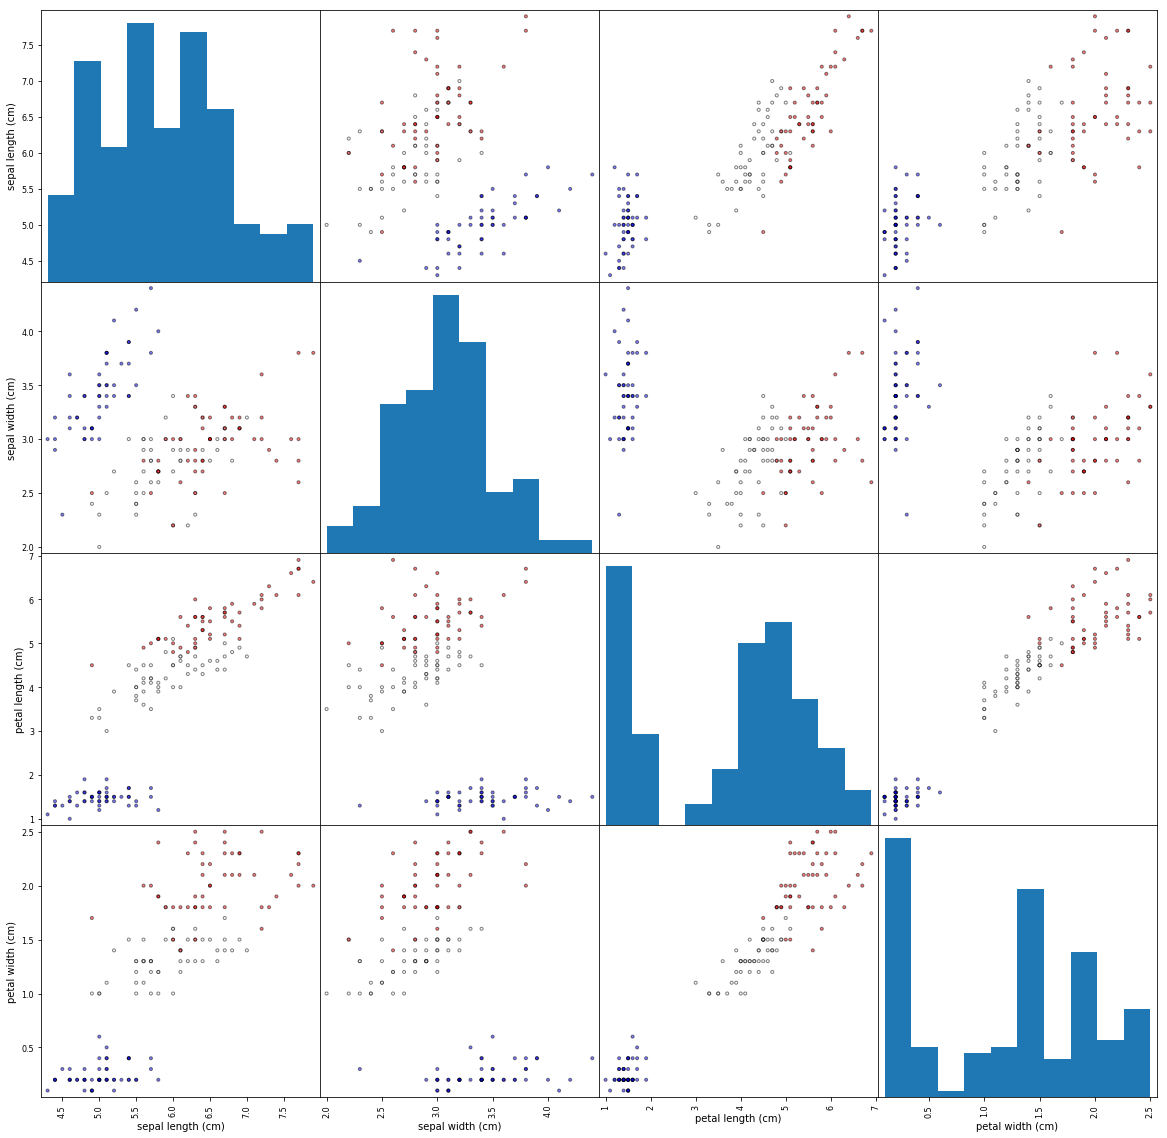

In [12]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, cmap=CMAP, edgecolor='black', figsize=(20, 20))

In [13]:
# plt.savefig('ML_0701.png', bbox_inches='tight')

## Das künstliche Neuron

In [14]:
w0 = 3
w1 = -4
w2 = 2

def neuron_no_activation(x1, x2):
    sum = w0 + x1 * w1 + x2 * w2
    return sum

In [15]:
iris.data[0]

array([ 5.1,  3.5,  1.4,  0.2])

In [16]:
neuron_no_activation(5.1, 3.5)

-10.399999999999999

### Activation Functions

In [7]:
def centerAxis(uses_negative=False):
    # http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    if uses_negative:
        ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

#### Step Function: abrupter, nicht stetig differenzierbarer Übergang zwischen 0 und 1

In [18]:
def np_step(X):
    return 0.5 * (np.sign(X) + 1)

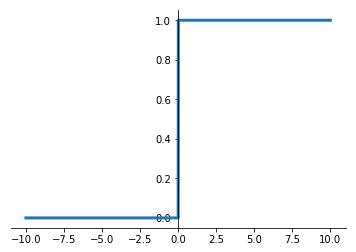

In [19]:
x = np.arange(-10,10,0.01)
y = np_step(x)

centerAxis()
plt.plot(x, y, lw=3)

#### Sigmoid Function: Fließender Übergang zwischen 0 und 1

In [20]:
def np_sigmoid(X):
    return 1 / (1 + np.exp(X * -1))

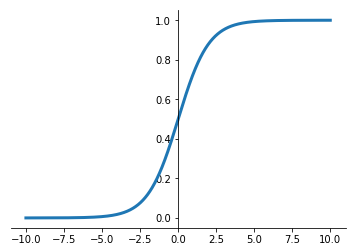

In [21]:
x = np.arange(-10,10,0.01)
y = np_sigmoid(x)

centerAxis()
plt.plot(x,y,lw=3)

#### Tangens Hyperbolicus Function: Fließender Übergang zwischen -1 und 1

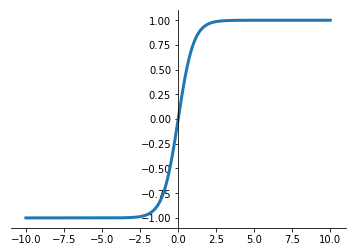

In [8]:
x = np.arange(-10,10,0.01)
y = np.tanh(x)

centerAxis()
plt.plot(x,y,lw=3)

#### Relu: Einfach zu berechnen, setzt kompletten negativen Wertebereich auf 0

In [22]:
def np_relu(x):
    return np.maximum(0, x)

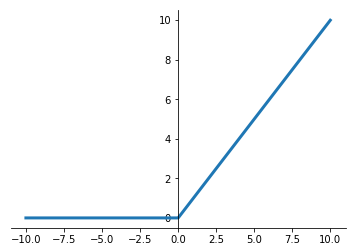

In [23]:
x = np.arange(-10,10,0.01)
y = np_relu(x)

centerAxis()
plt.plot(x,y,lw=3)

In [24]:
# https://docs.python.org/3/library/math.html
import math as math
def sigmoid(x):
    return 1 / (1 + math.exp(x * -1))

w0 = 3
w1 = -4
w2 = 2

def neuron(x1, x2):
    sum = w0 + x1 * w1 + x2 * w2
    return sigmoid(sum)

In [25]:
neuron(5.1, 3.5)

3.043155690056538e-05

In [26]:
# Version that takes as many values as you like
weights_with_bias = np.array([3, -4, 2])
def np_neuron(X):
    inputs_with_1_for_bias = np.concatenate((np.array([1]), X))
    return np_sigmoid(np.sum(inputs_with_1_for_bias*weights_with_bias));

In [27]:
np_neuron(np.array([5.1, 3.5]))

3.043155690056538e-05

## Unser erste Neuronales Netz mit Keras

In [28]:
from keras.layers import Input
inputs = Input(shape=(4, ))

In [29]:
from keras.layers import Dense
fc = Dense(3)(inputs)

In [30]:
from keras.models import Model
model = Model(input=inputs, output=fc)

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[-3.43178988,  1.73049867, -3.19597173]], dtype=float32)

In [34]:
inputs = Input(shape=(4, ))
fc = Dense(3)(inputs)
predictions = Dense(3, activation='softmax')(fc)
model = Model(input=inputs, output=predictions)

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 12        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[ 0.3897492 ,  0.17437252,  0.43587837]], dtype=float32)

# Training

In [38]:
X = np.array(iris.data)
y = np.array(iris.target)
X.shape, y.shape

((150, 4), (150,))

In [39]:
y[100]

2

In [40]:
from keras.utils.np_utils import to_categorical

num_categories = 3

y = to_categorical(y, num_categories)

In [41]:
y[100]

array([ 0.,  0.,  1.])

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [ ]:
# !rm -r tf_log

# https://keras.io/callbacks/#tensorboard
# tb_callback = keras.callbacks.TensorBoard(log_dir='./tf_log')
# To start tensorboard
# tensorboard --logdir=/mnt/c/Users/olive/Development/ml/tf_log
# open http://localhost:6006

In [44]:
# %time model.fit(X_train, y_train, epochs=500, validation_split=0.3, callbacks=[tb_callback])
%time model.fit(X_train, y_train, epochs=500, validation_split=0.3)

Train on 84 samples, validate on 36 samples
Epoch 1/500
84/84 [==============================] - 0s 3ms/step - loss: 1.1721 - acc: 0.4048 - val_loss: 1.1981 - val_acc: 0.4444
Epoch 2/500
84/84 [==============================] - 0s 354us/step - loss: 1.1381 - acc: 0.4524 - val_loss: 1.1656 - val_acc: 0.5278
Epoch 3/500
84/84 [==============================] - 0s 181us/step - loss: 1.1063 - acc: 0.4762 - val_loss: 1.1342 - val_acc: 0.5278
Epoch 4/500
84/84 [==============================] - 0s 290us/step - loss: 1.0738 - acc: 0.5119 - val_loss: 1.1040 - val_acc: 0.5556
Epoch 5/500
84/84 [==============================] - 0s 235us/step - loss: 1.0440 - acc: 0.5357 - val_loss: 1.0749 - val_acc: 0.5556
Epoch 6/500
84/84 [==============================] - 0s 142us/step - loss: 1.0153 - acc: 0.5595 - val_loss: 1.0472 - val_acc: 0.5556
Epoch 7/500
84/84 [==============================] - 0s 138us/step - loss: 0.9885 - acc: 0.5833 - val_loss: 1.0203 - val_acc: 0.5833
Epoch 8/500
84/84 [========

84/84 [==============================] - 0s 300us/step - loss: 0.4394 - acc: 0.7976 - val_loss: 0.4611 - val_acc: 0.7778
Epoch 122/500
84/84 [==============================] - 0s 169us/step - loss: 0.4382 - acc: 0.7976 - val_loss: 0.4598 - val_acc: 0.7778
Epoch 123/500
84/84 [==============================] - 0s 275us/step - loss: 0.4372 - acc: 0.7976 - val_loss: 0.4585 - val_acc: 0.7778
Epoch 124/500
84/84 [==============================] - 0s 208us/step - loss: 0.4360 - acc: 0.7976 - val_loss: 0.4572 - val_acc: 0.7778
Epoch 125/500
84/84 [==============================] - 0s 122us/step - loss: 0.4348 - acc: 0.7976 - val_loss: 0.4559 - val_acc: 0.7778
Epoch 126/500
84/84 [==============================] - 0s 115us/step - loss: 0.4338 - acc: 0.7976 - val_loss: 0.4546 - val_acc: 0.8056
Epoch 127/500
84/84 [==============================] - 0s 321us/step - loss: 0.4327 - acc: 0.7976 - val_loss: 0.4533 - val_acc: 0.8056
Epoch 128/500
84/84 [==============================] - 0s 481us/step 

Epoch 182/500
84/84 [==============================] - 0s 187us/step - loss: 0.3786 - acc: 0.8929 - val_loss: 0.3856 - val_acc: 1.0000
Epoch 183/500
84/84 [==============================] - 0s 263us/step - loss: 0.3776 - acc: 0.8929 - val_loss: 0.3844 - val_acc: 1.0000
Epoch 184/500
84/84 [==============================] - 0s 213us/step - loss: 0.3767 - acc: 0.8929 - val_loss: 0.3832 - val_acc: 1.0000
Epoch 185/500
84/84 [==============================] - 0s 333us/step - loss: 0.3758 - acc: 0.8929 - val_loss: 0.3820 - val_acc: 1.0000
Epoch 186/500
84/84 [==============================] - 0s 189us/step - loss: 0.3749 - acc: 0.8929 - val_loss: 0.3808 - val_acc: 1.0000
Epoch 187/500
84/84 [==============================] - 0s 154us/step - loss: 0.3739 - acc: 0.8929 - val_loss: 0.3796 - val_acc: 1.0000
Epoch 188/500
84/84 [==============================] - 0s 347us/step - loss: 0.3730 - acc: 0.8929 - val_loss: 0.3784 - val_acc: 1.0000
Epoch 189/500
84/84 [==============================] - 

Epoch 242/500
84/84 [==============================] - 0s 146us/step - loss: 0.3258 - acc: 0.9524 - val_loss: 0.3168 - val_acc: 1.0000
Epoch 243/500
84/84 [==============================] - 0s 201us/step - loss: 0.3248 - acc: 0.9524 - val_loss: 0.3157 - val_acc: 1.0000
Epoch 244/500
84/84 [==============================] - 0s 250us/step - loss: 0.3240 - acc: 0.9524 - val_loss: 0.3145 - val_acc: 1.0000
Epoch 245/500
84/84 [==============================] - 0s 118us/step - loss: 0.3232 - acc: 0.9524 - val_loss: 0.3134 - val_acc: 1.0000
Epoch 246/500
84/84 [==============================] - 0s 233us/step - loss: 0.3223 - acc: 0.9524 - val_loss: 0.3123 - val_acc: 1.0000
Epoch 247/500
84/84 [==============================] - 0s 209us/step - loss: 0.3215 - acc: 0.9524 - val_loss: 0.3111 - val_acc: 1.0000
Epoch 248/500
84/84 [==============================] - 0s 216us/step - loss: 0.3206 - acc: 0.9524 - val_loss: 0.3100 - val_acc: 1.0000
Epoch 249/500
84/84 [==============================] - 

Epoch 363/500
84/84 [==============================] - 0s 170us/step - loss: 0.2334 - acc: 0.9643 - val_loss: 0.1992 - val_acc: 1.0000
Epoch 364/500
84/84 [==============================] - 0s 221us/step - loss: 0.2328 - acc: 0.9643 - val_loss: 0.1984 - val_acc: 1.0000
Epoch 365/500
84/84 [==============================] - 0s 203us/step - loss: 0.2319 - acc: 0.9643 - val_loss: 0.1978 - val_acc: 1.0000
Epoch 366/500
84/84 [==============================] - 0s 354us/step - loss: 0.2314 - acc: 0.9643 - val_loss: 0.1973 - val_acc: 1.0000
Epoch 367/500
84/84 [==============================] - 0s 561us/step - loss: 0.2307 - acc: 0.9643 - val_loss: 0.1966 - val_acc: 1.0000
Epoch 368/500
84/84 [==============================] - 0s 169us/step - loss: 0.2302 - acc: 0.9643 - val_loss: 0.1958 - val_acc: 1.0000
Epoch 369/500
84/84 [==============================] - 0s 297us/step - loss: 0.2296 - acc: 0.9643 - val_loss: 0.1949 - val_acc: 1.0000
Epoch 370/500
84/84 [==============================] - 

Epoch 484/500
84/84 [==============================] - 0s 163us/step - loss: 0.1721 - acc: 0.9643 - val_loss: 0.1285 - val_acc: 1.0000
Epoch 485/500
84/84 [==============================] - ETA: 0s - loss: 0.2079 - acc: 0.937 - 0s 85us/step - loss: 0.1717 - acc: 0.9643 - val_loss: 0.1282 - val_acc: 1.0000
Epoch 486/500
84/84 [==============================] - 0s 235us/step - loss: 0.1713 - acc: 0.9643 - val_loss: 0.1278 - val_acc: 1.0000
Epoch 487/500
84/84 [==============================] - 0s 96us/step - loss: 0.1712 - acc: 0.9762 - val_loss: 0.1275 - val_acc: 1.0000
Epoch 488/500
84/84 [==============================] - 0s 131us/step - loss: 0.1705 - acc: 0.9762 - val_loss: 0.1266 - val_acc: 1.0000
Epoch 489/500
84/84 [==============================] - 0s 168us/step - loss: 0.1701 - acc: 0.9643 - val_loss: 0.1258 - val_acc: 1.0000
Epoch 490/500
84/84 [==============================] - 0s 79us/step - loss: 0.1698 - acc: 0.9643 - val_loss: 0.1251 - val_acc: 1.0000
Epoch 491/500
84/84 

# Bewertung

In [45]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[  9.94341850e-01,   5.65805100e-03,   8.86318006e-08]], dtype=float32)

In [46]:
X[0], y[0]

(array([ 5.1,  3.5,  1.4,  0.2]), array([ 1.,  0.,  0.]))

In [47]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
train_loss, train_accuracy

120/120 [==============================] - 0s 130us/step


(0.15265472332636515, 0.97499999999999998)

In [48]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_loss, test_accuracy

30/30 [==============================] - 0s 360us/step


(0.13830555975437164, 1.0)